# 决策树

和支持向量机一样，	决策树是一种多功能机器学习算法，	即可以执行 __分类任务__ 也可以执行 __回归任务__，	甚至包括 __多输出（multioutput）任务__.

### 一、决策树的特性：

* __1、不需要太多的数据预处理__ ，尤其是不需要进行 __特征缩放__ 和 __数据归一化__。

### 二、Scikit-Learn 中的决策树：

* Scikit-Learn 用的是	__CART	算法__ ，	__CART 算法仅产生二叉树__：每一个非叶节点 __总是只有两个子节点__ （只有是或否两个结果）。

 然而，像__ID3__	这样的算法 __可以产生超过两个子节点__ 的决策树模型。

### 三、CART	训练算法

CART是一种贪婪算法，但是不保证全局最优，只保证 "每一次分裂" 是最优的。找到最优树是一个NP问题。

### 四、计算复杂度

* __预测：__ 决策树模型的进行 __“预测”__  时：复杂度为 O(log2^m),__与特征数量无关__ ，所以即使在处理大型训练集时，预测速度也非常 __快__。


* __训练：__ 算法的时候（训练和预测不同）需要比较所有特征，就有了 O(nmlog(m)) 的训练复杂度：


     小型训练集： (少于几千例)，Scikit-Learn 可以通过预先设置数据(presort = True)来加速训练。
    
     较大训练集： 来说会显着减慢训练速度。
     
### 五、Gini系数和熵

决策树__默认__使用__基尼系数__来对不纯度进行检测，但是也可以通过设置 __标准超参数__ entropy 来指定__熵__不纯度进行检测。

#### 5.1、问题：到底使用基尼系数还是使用熵来计算不纯度？

事实上大部分情况都没有多大的差别：他们会生成类似的决策树。


__基尼指数__计算稍微快一点，所以这是一个很好的默认值。但是，也有的时候它们会产生不同的树：


* __基尼指数：__ 会趋于在树的分支中将最多的类隔离出来。
    
    
* __熵指数：__ 趋向于产生略微平衡一些的决策树模型。

### 六、正则化超参数

决策树几乎不对训练数据做任何假设（于此相反的是线性回归等模型，这类模型通常会假设 数据是符合线性关系的）。

__如果不添加约束__ ，树结构模型通常将根据训练数据调整自己，使自身能够很好的拟合数据， 而这种情况下大多数会导致 __模型过拟合__。


* __非参数模型：__ 这一类的模型通常会被称为 __非参数模型__ ，这不是因为它没有任何参数（通常也有很多），而是因为在训练之前 __没有确定参数的具体数量__ ，所以模型结构可以根据数据的特性 __自由生长__。


* __参数模型：__ 于此相反的是，像线性回归这样的参数模型有 __事先设定好的参数数量__ ，所以__自由度是受限__的，这就__减少了过拟合的风险__（但是__增加了欠拟合的风险__）。

#### 如何限制决策树生长？

<img width="800" height="400" src="5.jpg"/>


#### 导入基础包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

## 决策树的训练和可视化


In [3]:
from sklearn.tree import export_graphviz       # 决策树模型可视化
from sklearn.tree import DecisionTreeClassifier

In [4]:
x_iris = iris.data[:,2:] # petal length and width
y_iris = iris.target

In [5]:
x_iris.shape

(150, 2)

#### 实例化决策树，不指定参数

In [6]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x_iris,y_iris)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### 可视化决策树模型

#### export_graphviz 参数：

* __filled__ : bool, optional (default=False)

 设置为时True，绘制节点以指示分类的多数类，值的极值用于回归，或节点的纯度用于多输出。
 
* __rounded__ : bool, optional (default=False)
 
 设置为时True，绘制带有圆角的节点框，并使用Helvetica字体代替Times-Roman。

In [7]:
export_graphviz(tree_clf,
               out_file='./iris_tree.dot',
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True) # 为True时，绘制出来的图像有颜色

### 提示：

使用 __export_graphviz__ 绘制出来的图像是 __.dot文件__ ，如果要查看的话建议还是 __转化成 png 或者其他格式__ 。

__转化方法__ ：在命令行 (cmd) 中进行转换



* dot -Tpng tree.dot -o tree.png    (PNG format)


* dot -Tps tree.dot -o tree.ps      (PostScript format)

<div><img width="400" height="300" src="1-1.png"/></div>

#### 可视化模型图介绍：

* __samples__	属性统计出它应用于多少个训练样本实例 (__有多少实例被划分到此__)。


* __value__	属性告诉你这个节点对于每一个类别的样例有多少个 (__这些实例分别属于什么类型__)。


* __Gini__ 属性用于测量它的纯度：如果一个节点包含的所有训练样例全都是同一类 别的，我们就说这个节点是纯的（Gini=0） __Gini值越小表示节点越纯。__

#### 如何计算Gini分数：

<img width="500" height="400" src="2.jpg"/>

__举个例子__ ，__深度为 2__  的 __左侧__ 节点(从上到下数第三行)  __基尼指数__ 为：<img width="500" height="400" src="3.jpg"/>

####  绘制决策边界

绘制 max_depth 参数为 2 的模型。

In [8]:
from mlxtend.plotting import plot_decision_regions

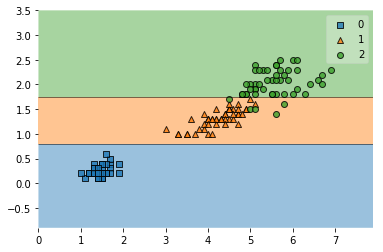

In [9]:
plot_decision_regions(x_iris,y_iris,tree_clf)

#### 重新生成一个决策树

设置 max_depth 参数为3。

In [10]:
tree_clf2 = DecisionTreeClassifier(max_depth=3)
tree_clf2.fit(x_iris,y_iris)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

####  绘制决策边界

可以看出，设置最大深度会影响决策边界

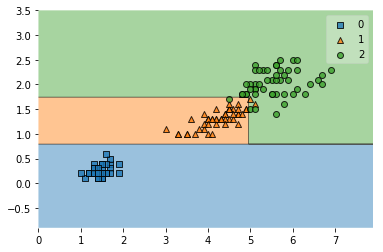

In [11]:
plot_decision_regions(x_iris,y_iris,tree_clf2)

### 决策树的决策边界

粗的垂直线代表根节点（深度为	0）的决定边界：花瓣长度 为	2.45	厘米。由于左侧区域是纯的（只有 Iris-Setosa），所以不能再进一步分裂。然而，右 边的区域是不纯的，所以深度为 1 的右边节点在花瓣宽度为 1.75 厘米处分裂（用虚线表示）。

又由于 max_depth 设置为 2，决策树在那里停了下来。但是，如果将 max_depth 设置为 3，两个深度为 2 的节点，每个都将会添加另一个决策边界（用虚线表示）。

#### 决策边界对比图 (max_depth=2/3)：

<img width="600" height="500" src="4.jpg"/>

#### 模型小知识：白盒与黑盒

__决策树__ 非常直观，他们的决定很容易被解释。这种模型通常被称为 __白盒模型__ 。相反， __随机森林__ 或 __神经网络__ 通常被认为是__黑盒模型__。


### 估计分类概率

决策树还可以估计某个实例属于特定类 __k__	的 __概率__ ：首先遍历树来查找此实例的叶节点，然后它返回此节点中类 k 的训练实例的比例。

In [12]:
from sklearn.model_selection import cross_val_predict

#### 预测为x类的概率

Iris-Setosa	为	0%（0/54），Iris-Versicolor	为 90.7%（49/54），Iris-Virginica	为	9.3%（5/54）

In [13]:
display(tree_clf.predict_proba([[5,1.5]]))
tree_clf.predict([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

array([1])

### 决策树回归

In [14]:
from sklearn.tree import DecisionTreeRegressor 

In [15]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x_iris,y_iris)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

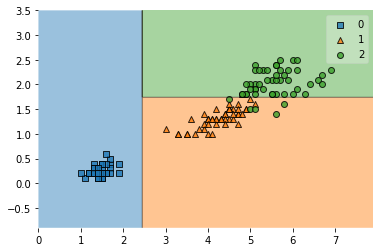

In [16]:
plot_decision_regions(x_iris,y_iris,tree_reg)

In [17]:
tree_reg2 = DecisionTreeRegressor(max_depth=3)
tree_reg2.fit(x_iris,y_iris)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

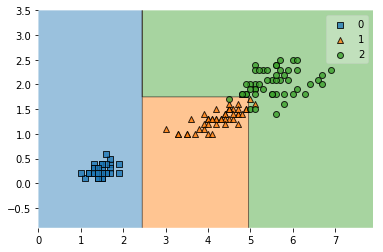

In [18]:
plot_decision_regions(x_iris,y_iris,tree_reg2)

### 练习：对	moons	数据集进行决策树训练并优化模型。


In [19]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn .model_selection import cross_validate

__1、通过语句	make_moons(n_samples=10000,	noise=0.4)	生成	moons	数据集__

In [20]:
x,y = datasets.make_moons(n_samples=10000, noise=0.4)

__2、通过	train_test_split()	将数据集分割为训练集和测试集__

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

__3、进行交叉验证，并使用网格搜索法寻找最好的超参数值（使用	GridSearchCV)__

提示:	尝试各种各样的	max_leaf_nodes	值

KFold:
* 提供训练/测试索引以将数据拆分为训练/测试集。将数据集拆分为k个连续的折叠（默认情况下不进行混洗）。


* 然后将每个折叠用作一次验证，而剩下的k-1个折叠形成训练集。

In [22]:
cv_split = KFold(10,shuffle=False,random_state=42)
param_grid = {'max_leaf_nodes':[3,5,8,10,15,25,40]}

In [23]:
dtree_clf = DecisionTreeClassifier()

In [24]:
grid_model = GridSearchCV(dtree_clf,param_grid=param_grid,scoring='roc_auc',cv=cv_split,return_train_score=True)
grid_model.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [3, 5, 8, 10, 15, 25, 40]},
   

In [25]:
print('After DT Parameters',grid_model.best_params_)
print('AFTER DT Training w/bin score mean: {:.2f}'.format(grid_model.cv_results_['mean_train_score'][grid_model.best_index_]))
print('AFTER DT Test w/bin score mean: {:.2f}'.format(grid_model.cv_results_['mean_test_score'][grid_model.best_index_]))
print('AFTER DT Test w/bin score 3*std: +/- {:.2f}',grid_model.cv_results_['std_test_score'][grid_model.best_index_])
grid_model = grid_model.best_estimator_

After DT Parameters {'max_leaf_nodes': 25}
AFTER DT Training w/bin score mean: 0.93
AFTER DT Test w/bin score mean: 0.92
AFTER DT Test w/bin score 3*std: +/- {:.2f} 0.01266550195795254


In [26]:
cv_result = cross_validate(grid_model,x_test,y_test,cv = 5,scoring='roc_auc',return_train_score=True)

In [27]:
print('MLA Train Accuracy Mean',cv_result['train_score'].mean())
print('MLA Test Accuracy Mean',cv_result['test_score'].mean())
print('MLA Test std*3 ',cv_result['test_score'].std()*3)

MLA Train Accuracy Mean 0.9413454810269544
MLA Test Accuracy Mean 0.9155239948098188
MLA Test std*3  0.033885446019134936


# 随机森林

如果你合并了一组 分类器的预测（像分类或者回归），你也会得到一个比单一分类器更好的预测结果。这一组分类器就叫做集成；因此，这个技术就叫做集成学习，一个集成学习算法就叫做集成方法。

* __决策树的集成就叫做随机森林。__

### 注意：

__集成出来的分类器比原来的分类器效果要好__ 是建立在所有的分类器都 __独立运行__ ， __不会发生有相关性的错误__ 的情况下。然而 __每一个分类器都在同一个数据集上训练__ ，导致其很可能会发生这样的错误。他们 __可能会犯同一种错误__ ，所以也会有很多票投给了错误类别导致集成的 __准确率下降__。


如果使每一个分类器都独立自主的分类，那么集成模型会工作的很好。 __去得到多样的分类器的方法之一__ 就是 __用完全不同的算法__ ，这会使它们会做出不同种类的错误，这会提高集成的正确率


### 投票决策

* __硬投票：__ 整合每一个分类器的预测然后经过投票去预测分类。这种分类器就叫做硬投票分类器。__（直接用类别值，少数服从多数。）__


* __软投票：__ 以最高的类概率来预测这个类，平均在所有的分类器上。这种方式叫做软投票。他经常比硬投票表现的更好，因为它给予高自信的投票更大的权重。__（各自分类器的概率值进行加权平均）__

__软投票__，他经常比硬投票表现的更好，因为它给予高自信的投票更大的权重。你可以通过把 __voting="hard"__ 设置为 __voting="soft"__ 来保证分类器可以预测类别概率。



In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [29]:
# x_train_iris,x_iris_test,y_iris_train,y_iris_test = train_test_split(x_iris,y_iris,test_size = 0.3)

In [30]:
rdf_clf = RandomForestClassifier() 
log_clf = LogisticRegression()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rdf',rdf_clf),('svm_clf',svm_clf)],voting='hard')
voting_clf.fit(x_train,y_train)

D:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rdf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini'...
                                        

#### 测试模型的准确率

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
for clf in (rdf_clf,log_clf,svm_clf,voting_clf):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

D:\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RandomForestClassifier 0.8393333333333334
LogisticRegression 0.8323333333333334
SVC 0.8576666666666667


D:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.8493333333333334


### 提示：

如果所有的分类器都能够预测类别的概率 (例如他们有一个	__predict_proba()__	方法)，那么你就可以让 sklearn	以最高的类概率来预测这个类，平均在所有的分类器上。这是__软投票__。


然而这不是 SVC 类的分类器默认的选项，所以你需要把它的	probability	hyperparameter	设置为 True（这会 使	SVC	使用交叉验证去预测类别概率，其降低了训练速度，但会添加	predict_proba()	方法）


In [33]:
rdf_clf = RandomForestClassifier() 
log_clf = LogisticRegression()
svm_clf2 = SVC(probability=True)  # probability 否启用概率估计。必须在调用之前启用它，这fit会减慢该方法的速度。

voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rdf',rdf_clf),('svm_clf2',svm_clf2)],voting='soft')
voting_clf.fit(x_train,y_train)

D:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rdf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini'...
                                        

In [34]:
for clf in (rdf_clf,log_clf,svm_clf2,voting_clf):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

D:\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RandomForestClassifier 0.842
LogisticRegression 0.8323333333333334
SVC 0.8576666666666667


D:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.8573333333333333


## Bagging 和 Pasting

__对每一个分类器都使用相同的训练算法，但是在 不同的训练集上 去训练它们 Bagging和Pasting：__

* __Bagging：__ 有放回采样被 称为装袋（Bagging，是	bootstrap	aggregating	的缩写）

* __pasting：__ 无放回采样称为粘贴 （pasting）

换句话说，__Bagging__	和	__Pasting__	都允许在多个分类器上对训练集进行多次采样，但只有 __Bagging__	允许对同一种分类器上对训练集进行进行__多次采样__。

#### 聚合

当所有的分类器被训练后，集成可以通过对所有分类器结果的简单__聚合__(合并所有模型)来对新的实例进行预测。

聚合函数通常对__分类__是__统计模式__（例如硬投票分类器）或者对__回归__是__平均__。

每一个单独的分类器在如果在原始训练集上都是高偏差，但是__聚合降低了偏差和方差__。通常情况下，集成的结果是有一个相似的偏差，但是对比与在原始训练集上的单一分类器来讲有更小的方差，聚合之后模型通常更优。

In [40]:
from sklearn.model_selection import train_test_split

In [69]:
x,y = datasets.make_moons(n_samples=500, noise=0.2)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [39]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

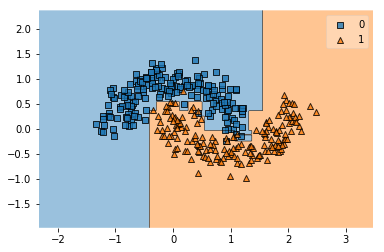

In [71]:
plot_decision_regions(x_train,y_train,dt_clf)

#### BaggingClassifier

* n_estimators=500：集成 500 个子模型；
* max_samples=100：每个子模型看 100 个样本数据；
* bootstrap=True：表示采用 Bagging 的方式从样本数据中取样；（默认方式）
* bootstrap=False：表示采用 Pasting 的方式从样本数据中取样；
* oob_score = True : 使用oob进行模型的自动评估；
* splitter：用于在每个节点上选择拆分的策略。支持的策略是“best”(最佳) 选择最佳拆分，“random”(随机) 选择最佳随机拆分。

In [72]:
bagging_dt_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=1)
bagging_dt_clf.fit(x_train,y_train)
y_pred = bagging_dt_clf.predict(x_test)

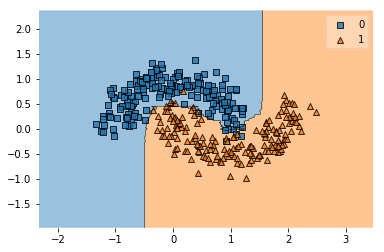

In [73]:
plot_decision_regions(x_train,y_train,bagging_dt_clf)

可以从决策边界看出bagging的效果更好些，总体而言， Bagging	通常会导致更好的模型，这就解释了为什么它通常是首选的。

### Out of bag (袋外数据)

随机森林有一个重要的优点就是，没有必要对它进行交叉验证或者用一个独立的测试集来获得误差的一个无偏估计。它可以在内部进行评估，也就是说在生成的过程中就可以对误差建立一个无偏估计。

随机森铃在生成每颗决策树时，会随机且__有放回的抽取样本__，每棵决策树会有大概1/3的样本未抽取到，这些样本就是每棵树的oob样本。具体计算过程如下：

<img width="400" height="100" src="6.jpg"/>

* 1/N是某个样本被抽到的概率，1=1/N 表示不被抽到的概率。

* 其中 N 是训练集的大小，这意味着平均下来只有63%的训练实例被每 个分类器采样，__剩下的37%个没有被采样的训练实例就叫做 Out-of-Bag 实例__。

包外估计是对集成分类器泛化误差的无偏估计. 在随机森林算法中数据集属性的重要性、分类器集强度和分类器间相关性计算都依赖于袋外数据（Out-of-Bag）

In [76]:
bagging_dt_clf2 = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,n_jobs=1,oob_score=True,bootstrap=True)
bagging_dt_clf2.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [81]:
from sklearn.metrics import accuracy_score

In [87]:
print('oob 计算得到分数为：',bagging_dt_clf2.oob_score_)
print('\n模型的精确率为：',accuracy_score(y_test,y_pred))

oob 计算得到分数为： 0.9457142857142857

模型的精确率为： 0.9466666666666667


#### oob_decision\_function\_

* 需要 oob_score = True 时才能被调用。

对于每个训练实例	oob	决策函数也可通过	oob_decision\_function\_ 	变量来展示。在这种情况 下（当基决策器有	predict_proba()	时）决策函数会对每个训练实例返回类别概率。

例如， oob	评估预测第4个训练实例有 85% 的概率属于正类（14.9%	属于负类）：

In [92]:
bagging_dt_clf2.oob_decision_function_[:10]

array([[0.00269542, 0.99730458],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.85066667, 0.14933333],
       [0.9867374 , 0.0132626 ],
       [0.9403794 , 0.0596206 ],
       [0.00558659, 0.99441341],
       [0.04336043, 0.95663957],
       [0.94162437, 0.05837563],
       [1.        , 0.        ]])

In [93]:
y_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

## 随机森林

随机森林算法在树生长时引入了额外的随机